# Exploratory Data Analysis on a Natural Language Processing Task
> Authors: Caroline Schmitt, Matt Brems

---

Exploratory data analysis (EDA) is a crucial part of any data science project. EDA helps us discover interesting relationships in the data, detect outliers and errors, examine our own assumptions about the data, and prepare for modeling. During EDA we might discover that we need to clean our data more conscientiously, or that we have more missing data than we realized, or that there aren't many patterns in the data (indicating that modeling may be challenging.)

In this lab you'll bring in a natural language dataset and perform EDA. The dataset contains Facebook statuses taken from between 2009 and 2011 as well as personality test results associated with the users whose Facebook statuses are included.

This dataset uses results from the Big Five Personality Test, also referred to as the five-factor model, which measures a person's score on five dimensions of personality:
- **O**penness
- **C**onscientiousness
- **E**xtroversion
- **A**greeableness
- **N**euroticism

Notoriously, the political consulting group Cambridge Analytica claims to have predicted the personalities of Facebook users by using those users' data, with the goal of targeting them with political ads that would be particularly persuasive given their personality type. Cambridge Analytica claims to have considered 32 unique 'groups' in the following fashion:
- For each of the five OCEAN qualities, a user is categorized as either 'yes' or 'no'.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$).

Cambridge Analytica's methodology was then, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big Five personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

In this lab you will perform EDA to examine many relationships in the data.

Exploratory data analysis can be a non-linear process, and you're encouraged to explore questions that occur to you as you work through the notebook.

> **Content note**: This dataset contains real Facebook statuses scraped from 2009 to 2011, and some of the statuses contain language that is not safe for work, crude, or offensive. The full dataset is available as `mypersonality.csv`, and a sanitized version containing only statuses that passed an automated profanity check is available as `mypersonality_noprofanity.csv`. Please do not hesitate to use `mypersonality_noprofanity.csv` if you would prefer to. Please note that the automated profanity check is not foolproof. If you have any concerns about working with this dataset, please get in touch with your section lead.

---

### External resources

These resources are not required reading but may be of use or interest.

- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Wikipedia page](https://en.wikipedia.org/wiki/Big_Five_personality_traits) on the Big Five test
- [A short (3-4 pages) academic paper](./celli-al_wcpr13.pdf) using the `MyPersonality` dataset to model personality

---

## Load packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

---

## Load data

In [2]:
df = pd.read_csv('data/mypersonality.csv')
# df = pd.read_csv('data/mypersonality_noprofanity.csv') # comment out above & uncomment this to use mypersonality_noprofanity.csv
df.drop(columns=['NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY'], inplace=True)
df.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM


---

## EDA on Statuses

Before we even vectorize the text, we might look at the lengths and word counts in each Facebook status.

#### Create a new column called `status_length` that contains the length of each status:

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df['status_length'] = df['status'].transform(len)

#### Create a new column called `status_word_count` that contains the number of words in each status:

Note: You can evaluate this based off of how many strings are separated by whitespaces; you're not required to check that each set of characters set apart by whitespaces is a word in the dictionary.

In [5]:
df['status_word_count'] = df['status'].map(lambda x: len(x.split(' ')))

### Longest and shortest statuses

Looking at individual observations can help us get a sense of what the dataset contains.

#### Show the five longest and five shortest statuses based off of `status_word_count`:

In [6]:
df.sort_values(by = 'status_word_count')['status'].head()

8316                                                                 *PROPNAME*'s?
7614    http:////ca.news.yahoo.com//s//capress//091008//world//eu_nobel_literature
9099                                                                            no
229                                                                        MLIG!!!
4014                                                                          2010
Name: status, dtype: object

In [7]:
df.sort_values(by = 'status_word_count', ascending=False)['status'].head()

2188                                                                                                                                                    just found an organization called Think Before You Speak that flips out about people saying, "that's gay," claiming that it's offensive.  That's pretty gay, if you ask me.                                                                                    
496     Exact words when renewing DL: Me: Oh no, you can't take my license, It's my 25th b-day. How am I going to get into the bar? DMV: We gonna give you a new one over there Me: But, it won't have my picture and stuff on it.  Dmv:  Hold up, we can take a picture of your picture and put it on a license i think. (yelling at co-worker to see if this can be done) Yup! Me: So, I can go to the bar?! Dmv: ...
5680        I always make it a rule to let the other fellow fire first.  If a man wants to fight, I argue the question with him and try to show him how foolish it would be.  If he can'

## What's the distribution of post lengths?

Use visuals to show the distributions of post lengths. Show both the distribution of word counts and the distribution of lengths based off character.

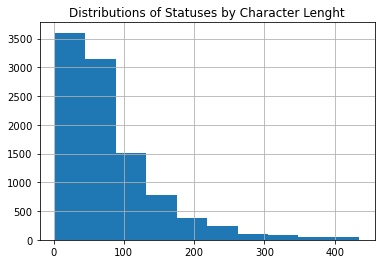

In [8]:
df['status_length'].hist()
plt.title('Distributions of Statuses by Character Lenght');

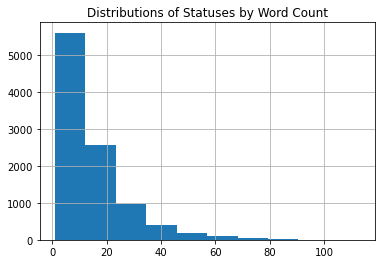

In [9]:
df['status_word_count'].hist()
plt.title('Distributions of Statuses by Word Count');

---

## EDA of Personality Scores

There are two sets of personality columns in the dataset: class and score. According to the attached paper, scores have been converted to categories based on whether a score for a user fell above or below the median.

### Plot the distributions of personality scores for all five score columns:

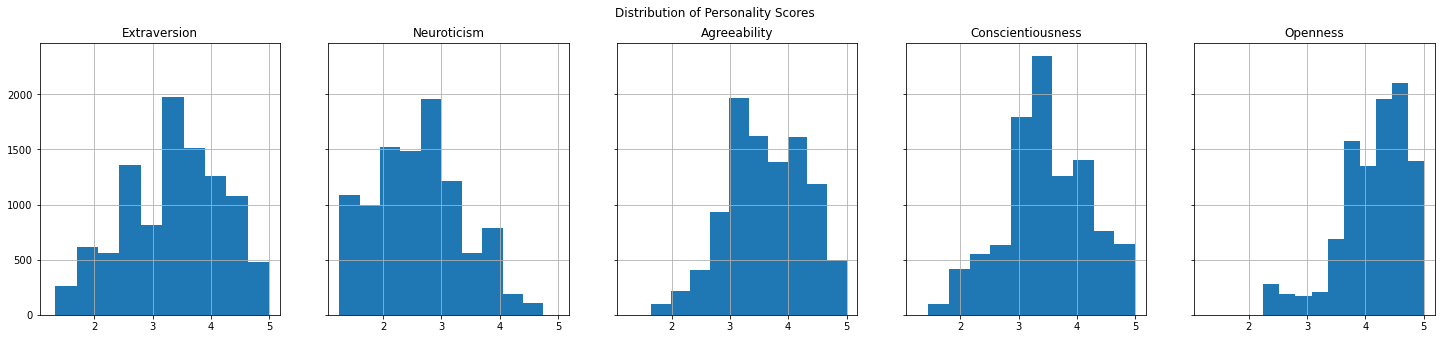

In [10]:
fig, axs = plt.subplots(1, 5, figsize = (25, 5), sharey = True, sharex = True)

a = df['sext'].hist(ax = axs[0])
b = df['sneu'].hist(ax = axs[1])
c = df['sagr'].hist(ax = axs[2])
d = df['scon'].hist(ax = axs[3])
e = df['sopn'].hist(ax = axs[4])

a.set(title = 'Extraversion')
b.set(title = 'Neuroticism')
c.set(title = 'Agreeability')
d.set(title = 'Conscientiousness')
e.set(title = 'Openness')

fig.suptitle('Distribution of Personality Scores');

---

### How many unique users exist in the dataset?

This dataset has redacted original poster names, but each user is given an `#AUTHID`. How many unique users are there, and how many posts per user do we have?

In [11]:
len(df['#authid'].unique())

250

## EDA on unique users

Because we have many posts per user for most users, doing EDA on the personality score columns might be misleading. If we have 200 Facebook statuses from one very high-conscientiousness user, a bar chart of how many `'cCON'` statuses are associated with `'y'` might be misleading. We'll have to be careful about labeling and titling any visualizations we make off of the dataset.

#### Create a new dataframe called `unique_users` that only contains the `#AUTHID`, personality score, and personality category columns:

If you do this correctly, it should have 250 rows and 11 columns.

(Hint: You can use the pandas [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) method to make this easier. The only column you want to consider when deciding if a user is duplicated is the `#AUTHID` column.)

In [12]:
cat_cols = ['cext', 'cneu', 'cagr', 'ccon', 'copn']
sc_cols = ['sext', 'sneu', 'sagr', 'scon', 'sopn']

In [13]:
unique_users = df.drop_duplicates(subset = ['#authid'])
unique_users = unique_users[['#authid'] + cat_cols + sc_cols]

#### Plot the distribution of personality scores for `unique_users`:

Do the distributions look different? Here, each individual user will only be represented once.

#### Use the `.describe()` method on `unique_users`:

In [27]:
unique_users.describe()

,sext,sneu,sagr,scon,sopn
count,250.000000,250.000000,250.000000,250.000000,250.00000
mean,3.292120,2.627240,3.600320,3.522920,4.07856
std,0.861368,0.776835,0.670758,0.740211,0.57506
min,1.330000,1.250000,1.650000,1.450000,2.25000
25%,2.662500,2.000000,3.150000,3.000000,3.75000
50%,3.300000,2.590000,3.660000,3.500000,4.15000
75%,4.000000,3.150000,4.100000,4.050000,4.50000
max,5.000000,4.750000,5.000000,5.000000,5.00000


### Plots vs. Tables

Consider what different information is easily conveyed by the plots of scores, versus the table with summary statistics. Explain when you might present a distribution versus when you might present a table of summary statistics.

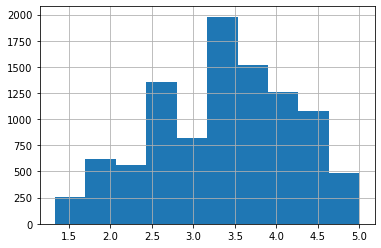

In [17]:
df['sext'].hist();

#### Other visualizations:

Create 1-2 additional visualizations related to the `unique_users` dataframe.

You might consider:
- Barcharts of users per category per trait
- A seaborn correlation heatmap
- A seaborn pairplot

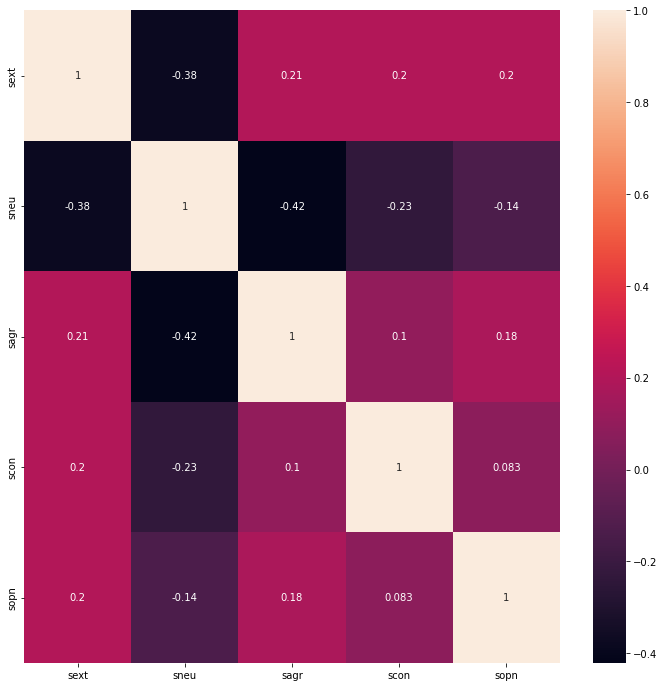

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(unique_users.corr(), annot=True);

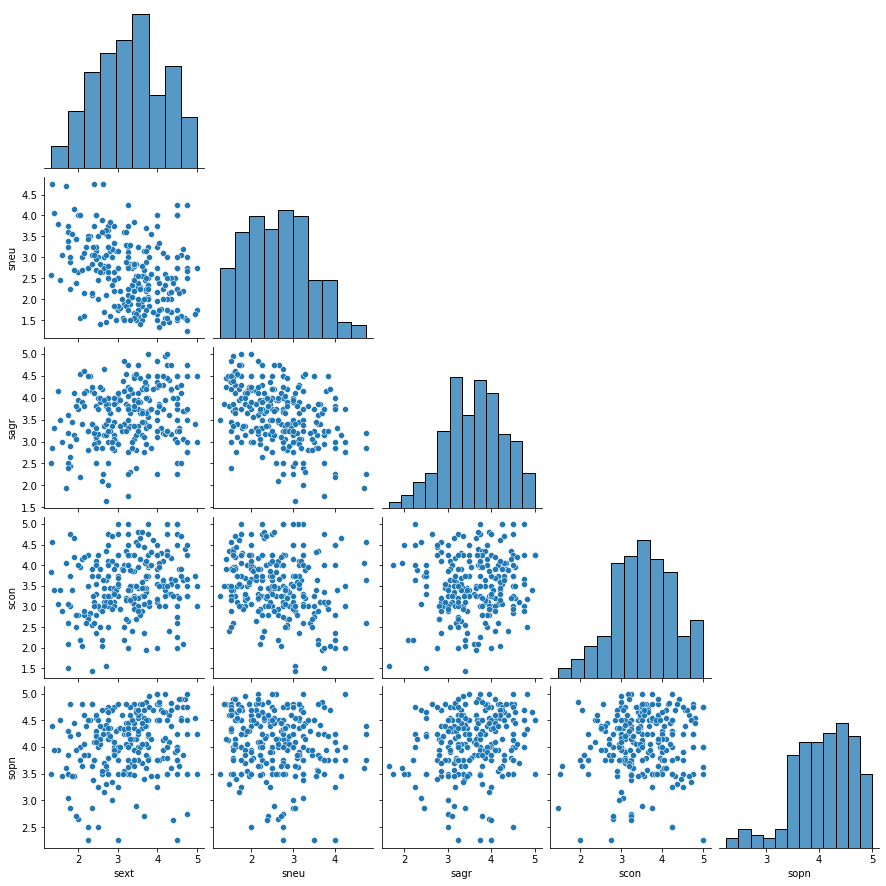

In [21]:
sns.pairplot(unique_users, corner=True)

---

## Exploring status length and word count based on personality

#### Using `groupby()`, find the mean status length and status word count for posts by users in the high and low categories of each of the Big 5 traits.

You'll need to use `groupby()` five separate times for this.

In [22]:
s = pd.DataFrame()

for i in range(5):
    p = df.groupby(cat_cols[i]).mean()[['status_length', 'status_word_count']]
    print(p)

      status_length  status_word_count
cext                                  
n         79.866655          14.659891
y         81.704918          14.843906
      status_length  status_word_count
cneu                                  
n         80.852396          14.753025
y         80.304278          14.712941
      status_length  status_word_count
cagr                                  
n         80.976769          14.857389
y         80.355800          14.632618
      status_length  status_word_count
ccon                                  
n         81.920149          14.969963
y         79.149034          14.465101
      status_length  status_word_count
copn                                  
n         85.686298          15.653318
y         78.905143          14.421631


#### Choose one of the personality category columns (i.e. `cOPN`, `cCON`, `cEXT`, `cAGR`, or `cNEU`.) Use `sns.distplot()` to visualize the distribution of status word counts of posts by users who score high (`y`) and the distribution of status word counts of posts by users who score low (`n`) in that personality category:

/Users/josedelgadillo/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/josedelgadillo/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


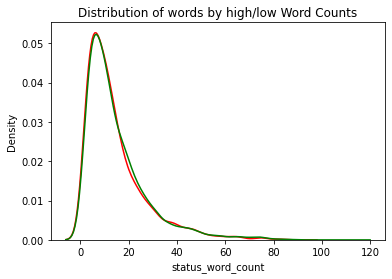

In [26]:
fig, axs = plt.subplots(1,1)
sns.distplot(df[df['ccon'] == 'y']['status_word_count'], hist = False, color = 'red', label = 'high (y, conscientiousness)')
sns.distplot(df[df['ccon'] == 'n']['status_word_count'], hist = False, color = 'green', label = 'low (y, conscientiousness)')

plt.title('Distribution of words by high/low Word Counts');

---

## EDA on Word Counts

### Vectorize the text

In order to perform EDA on word count data, we'll need to count-vectorize.

Create a dataframe that contains the count-vectorized text for each Facebook status in the dataset.

To do this, you might follow these steps:
- Instantiate a `CountVectorizer` object
- Fit the count vectorizer on the Facebook statuses
- Store the transformed data
- Convert to a dataframe and store
    - Don't forget that the transformed data will need to be 'densified'. The `toarray()` or `todense()` methods will allow this.
    - Don't forget that the `get_feature_names()` method on a fitted `CountVectorizer` object will bring you back the words learned from the dataset, which you can set as the `columns` argument when creating the dataframe.
    
It's up to you whether or not to keep stopwords in the dataset.

In [27]:
cvex = CountVectorizer()
c_data = cvex.fit_transform(df['status'])
c_data = pd.DataFrame(c_data.todense())

### Show the 15 most common words

In [28]:
c_data.sum().sort_values(ascending=False).head(15)

13581    4982
13770    4476
7139     3156
870      3057
9423     2093
6840     1984
7157     1669
5362     1641
8948     1564
15366    1495
10654    1309
13579    1158
9491     1094
15066     956
1522      894
dtype: int64

### Show the 15 frequency of the most common words as a bar chart

**Hint**: You can do this in one line of code. [This webpage](https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html) has an example.

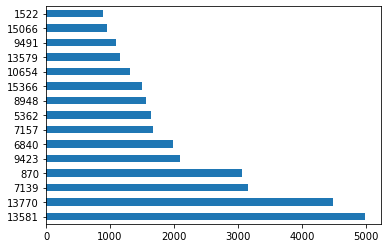

In [29]:
c_data.sum().sort_values(ascending=False).head(15).plot(kind='barh');

### Investigating `propname`

The word `propname` shows up frequently in this dataset. Show the first 10 statuses in the dataset that contain `propname`:

In [31]:
df[df['status'].str.contains('PROPNAME')].head(10)

,#authid,status,sext,sneu,sagr,scon,sopn,cext,cneu,cagr,ccon,copn,date,status_length,status_word_count
6,b7b7764cfa1c523e4e93ab2a79a946c4,"saw a nun zombie, and liked it. Also, *PROPNAME* + Tentacle!Man + Psychic Powers = GREAT Party.",2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,06/27/09 05:41 AM,95,17
18,b7b7764cfa1c523e4e93ab2a79a946c4,"is tired. *PROPNAME*, let me go to sleep pl0x.",2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,07/11/09 05:44 AM,46,9
69,b7b7764cfa1c523e4e93ab2a79a946c4,has a fair idea of how to manage the 2.5 kids cliche... She just needs a very strong gentleman named *PROPNAME* and thriteen wet napkins.,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,11/24/09 05:07 AM,137,25
101,b7b7764cfa1c523e4e93ab2a79a946c4,has a serious crush on *PROPNAME*. <3,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,01/25/10 02:57 AM,37,7
104,318bf822d4f2bd3920367560218619c0,Mondays are the new thursdays- anthony bourdain + *PROPNAME* = forgetting your financial troubles,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,06/23/09 05:41 AM,98,15
118,318bf822d4f2bd3920367560218619c0,is *PROPNAME*'s bestbian,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,08/23/09 06:03 AM,24,3
139,318bf822d4f2bd3920367560218619c0,is in love with *PROPNAME*.,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,10/04/09 03:09 AM,27,5
158,318bf822d4f2bd3920367560218619c0,is in love. With *PROPNAME*.,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,12/11/09 05:35 AM,28,5
170,318bf822d4f2bd3920367560218619c0,Ten Movies to Watch Right Now (and some you can Instant Netflix) 1. La Vie En Rose 2. Shrink (if you love LA) 3. Paris Je'taime (if you love Paris) 3. Clay Pidgeons (*PROPNAME* is priceless) 4. Quills 5. Away We Go 6. Sunshine Cleaning 7. A League of Their Own 8. Smart People (I Heart *PROPNAME*'s Page and SJP) 9. Frost//Nixon 10. Doubt,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,10/11/09 01:39 AM,338,64
202,ecbddbfe00e0f83cfdb802a7186061c7,"ATTENTION EVERYONE!!! Vote for the short ""AFTER HOURS"" to support *PROPNAME* - our local Michigan talent and a wonderful person. Repost please!!! http:////www.thirteen.org//sites//reel13//category//vote//",4.30,2.15,3.60,3.30,4.10,y,n,y,n,y,11/24/09 07:11 AM,204,23


#### Provide a short explanation of what you believe `propname` to be:

Hint: The attached PDF also contains an explanation.

Propname is a proper name of person that has been replaced with a fixed string to keep it anonymous.

## Most common words based on personality category

In order to do more targeted EDA, we'll need to be able to reference not only the dataframe of vectorized statuses, but also the personality scores from the original dataframe.

#### Create a new dataframe called `text_and_scores` that concatenates the count-vectorized statuses side-by-side with the original personality category columns:

In [34]:
text_and_scores = pd.concat([c_data, df[cat_cols]], axis=1)

#### Show the 25 most common words for statuses from high-cAGR users:

In [39]:
text_and_scores[text_and_scores['cagr'] == 'y'].iloc[:, :5].sum().sort_values(ascending=False).head(25)

0    10
1    10
4     8
2     1
3     1
dtype: int64

#### Show the 25 most common words for statuses from low-cAGR users:

In [38]:
text_and_scores[text_and_scores['cagr'] == 'n'].iloc[:, :-5].sum().sort_values(ascending=False).head(25)

13581    2401
13770    2065
7139     1470
870      1467
6840      998
9423      937
7157      812
5362      750
8948      717
15366     674
10654     610
13579     558
9491      524
15066     450
1522      409
1197      370
8388      367
12482     361
13633     343
9282      343
6271      334
7350      315
2300      308
2205      303
745       279
dtype: int64

### (BONUS) Most common bigrams:

This is a bonus section and not required.

Find the 10 most common bigrams in the dataset.

In [40]:
bi = CountVectorizer(ngram_range = (2, 2), stop_words='english')

bi_cv = bi.fit_transform(df['status'])
bi_cv = pd.DataFrame(bi_cv.todense(), columns = bi.get_feature_names_out())

In [41]:
bi_cv.sum().sort_values(ascending=False).head(10)

propname propname    147
just got              55
new year              53
http www              46
merry christmas       44
looking forward       43
feel like             39
happy new             32
don know              31
birthday wishes       29
dtype: int64

### (BONUS) Most common trigrams:

This is a bonus section and not required.

Find the 10 most common trigrams in the dataset.

In [43]:
trigrams = CountVectorizer(ngram_range=(3,3), stop_words='english')

trigrams_cv = trigrams.fit_transform(df['status'])
trigrams_cv = pd.DataFrame(trigrams_cv.todense(), columns=trigrams.get_feature_names_out())

In [44]:
trigrams_cv.sum().sort_values(ascending=False).head(10)


propname propname propname    54
gainesville film industry     23
www examiner com              23
http www examiner             23
24676 gainesville film        23
film industry examiner        23
happy new year                21
examiner com examiner         20
com examiner 24676            20
examiner 24676 gainesville    20
dtype: int64

---

## Choose your own adventure

By now you've looked at a lot of visualizations and frequency counts.

Come up with 2-3 questions about the data, and try to answer them using descriptive statistics (like counts, averages, etc.) or visualizations.

Some questions you might explore:
- Have numbers been redacted, or are phone numbers, house numbers, or zip codes anywhere in the dataset?
- `PROPNAME` has been used to redact personal names. Given that this data was scraped between 2009 and 2011, investigate if any public figures or famous people show up in the dataset, or their names have been redacted as well.
- Is count of uppercase letters vs. lowercase letters per status related to any personality category or personality score?
- Is _average_ word count per status related to any personality category or personality metric?
- Is punctuation use related to personality?

Or, of course, come up with your own questions to investigate!

The focus here is on "explore" -- you might not find anything of particular interest, but don't let that discourage you.

---

## Exploratory vs. Explanatory Data Analysis 

> **Exploratory analysis** is what you do to get familiar with the data. You may start out with a hypothesis or question, or you may just really be delving into the data to determine what might be interesting about it. Exploratory analysis is the process of turning over 100 rocks to find perhaps 1 or 2 precious gemstones.
>
> **Explanatory analysis** is what happens when you have something specific you want to show an audience - probably about those 1 or 2 precious gemstones. In my blogging and writing, I tend to focus mostly on this latter piece, explanatory analysis, when you've already gone through the exploratory analysis and from this have determined something specific you want to communicate to a given audience: in other words, when you want to tell a story with data.

- Cole Nussbaumer Knaflic, [exploratory vs. explanatory analysis](http://www.storytellingwithdata.com/blog/2014/04/exploratory-vs-explanatory-analysis)

### Choose one visual to explain:

Now that you've performed an exploratory data analysis, choose a visual (or 1-3 related visuals) to frame as _explanatory_. This can be a visual you created above, or you can create a new visual. For this visual, make sure the visuals are formatted clearly, and provide a one to two paragraph explanation/interpretation of the visual.